In [116]:
import pandas as pd 
import numpy as np 

In [117]:
df = pd.read_csv("../Hotel Reservations.csv")

In [118]:
df.duplicated().sum()

0

In [119]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [120]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

# Transform some variables to Nominal 

In [121]:
import matplotlib.pyplot as plt 
import seaborn as sns

<AxesSubplot: xlabel='booking_status', ylabel='count'>

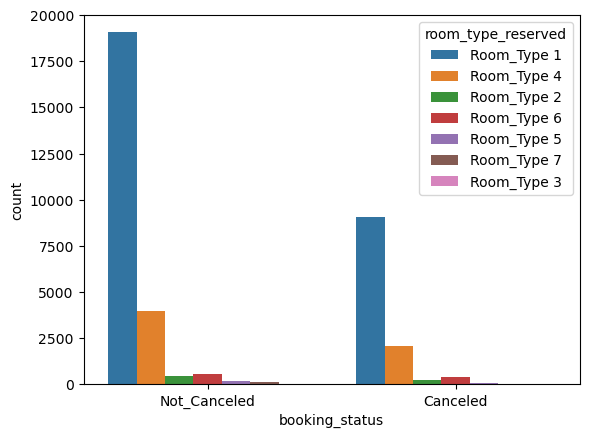

In [122]:
sns.countplot(data=df, x="booking_status", hue="room_type_reserved")

In [ ]:
ax = sns.countplot(x="booking_status", data=df, hue="room_type_reserved")
total = len(df["booking_status"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.1
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y), size=12)

# Add labels and title
ax.set_xlabel("Room type")
ax.set_ylabel("Count")
ax.set_title("Count Plot with Percentage")

# Show plot
plt.show()

It seems that the room could be ordinal. 

In [123]:
df.groupby(by="room_type_reserved")["avg_price_per_room"].mean().sort_values()

room_type_reserved
Room_Type 3     73.678571
Room_Type 2     87.848555
Room_Type 1     95.918532
Room_Type 5    123.733623
Room_Type 4    125.287317
Room_Type 7    155.198291
Room_Type 6    182.212836
Name: avg_price_per_room, dtype: float64

In [124]:
df[df["room_type_reserved"] =="Room_Type 1"]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36268,INN36269,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,2018,11,1,Offline,0,0,0,110.00,0,Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [125]:
df.drop(["Booking_ID"],axis=1, inplace=True)

In [126]:
df.booking_status.replace({"Not_Canceled": 0, "Canceled": 1},inplace=True)

In [127]:
df["room_type_reserved"]

0        Room_Type 1
1        Room_Type 1
2        Room_Type 1
3        Room_Type 1
4        Room_Type 1
            ...     
36270    Room_Type 4
36271    Room_Type 1
36272    Room_Type 1
36273    Room_Type 1
36274    Room_Type 1
Name: room_type_reserved, Length: 36275, dtype: object

In [128]:
ordinal_mapping = {'Room_Type 1': 3, 'Room_Type 2':2, 'Room_Type 3': 1,
                   'Room_Type 4': 5, 'Room_Type 5':4, 'Room_Type 6': 7,
                  'Room_Type 7':6}

# Map the room type to ordinal values
df['room_type_reserved'] = df['room_type_reserved'].map(ordinal_mapping)


In [129]:
df_dummy = pd.get_dummies(df,drop_first=True)

In [130]:
df_dummy.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
type_of_meal_plan_Meal Plan 2             uint8
type_of_meal_plan_Meal Plan 3             uint8
type_of_meal_plan_Not Selected            uint8
market_segment_type_Complementary         uint8
market_segment_type_Corporate           

In [131]:
Feb_wrong2018 = df[(df["arrival_year"] == 2018) & (df["arrival_month"] == 2) & (df["arrival_date"] >= 29)]
dropped_index = Feb_wrong2018.index
df_dummy.drop(dropped_index, axis = 0, inplace = True)

In [132]:
df_dummy

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,...,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,3,224,2017,10,2,...,65.00,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,3,5,2018,11,6,...,106.68,1,0,0,0,1,0,0,0,1
2,1,0,2,1,0,3,1,2018,2,28,...,60.00,0,1,0,0,0,0,0,0,1
3,2,0,0,2,0,3,211,2018,5,20,...,100.00,0,1,0,0,0,0,0,0,1
4,2,0,1,1,0,3,48,2018,4,11,...,94.50,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,5,85,2018,8,3,...,167.80,1,0,0,0,0,0,0,0,1
36271,2,0,1,3,0,3,228,2018,10,17,...,90.95,2,1,0,0,0,0,0,0,1
36272,2,0,2,6,0,3,148,2018,7,1,...,98.39,2,0,0,0,0,0,0,0,1
36273,2,0,0,3,0,3,63,2018,4,21,...,94.50,0,1,0,0,1,0,0,0,1


In [133]:
df_dummy

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,...,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,3,224,2017,10,2,...,65.00,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,3,5,2018,11,6,...,106.68,1,0,0,0,1,0,0,0,1
2,1,0,2,1,0,3,1,2018,2,28,...,60.00,0,1,0,0,0,0,0,0,1
3,2,0,0,2,0,3,211,2018,5,20,...,100.00,0,1,0,0,0,0,0,0,1
4,2,0,1,1,0,3,48,2018,4,11,...,94.50,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,5,85,2018,8,3,...,167.80,1,0,0,0,0,0,0,0,1
36271,2,0,1,3,0,3,228,2018,10,17,...,90.95,2,1,0,0,0,0,0,0,1
36272,2,0,2,6,0,3,148,2018,7,1,...,98.39,2,0,0,0,0,0,0,0,1
36273,2,0,0,3,0,3,63,2018,4,21,...,94.50,0,1,0,0,1,0,0,0,1


In [134]:
from sklearn.ensemble import IsolationForest
dat_iso = df_dummy
model = IsolationForest(n_estimators = 150,max_samples ='auto',contamination = "auto", max_features = 1.0)
model.fit(dat_iso)
scores = model.decision_function(dat_iso)
anomaly = model.predict(dat_iso)
dat_iso['scores'] = scores
dat_iso['anomaly'] = anomaly
anomaly = dat_iso.loc[dat_iso['anomaly'] == -1]
anomaly_index = list(dat_iso.index)
dat_iso_drop = dat_iso[dat_iso.anomaly == 1]
dat_iso_drop.head()
dat_iso_drop.drop(columns=['scores', 'anomaly'], inplace= True)
dat_iso_drop.head()

/var/folders/sv/npxlc_k53696tn8hryg5dx5w0000gn/T/ipykernel_51795/1179662965.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_iso_drop.drop(columns=['scores', 'anomaly'], inplace= True)


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,...,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,3,224,2017,10,2,...,65.00,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,3,5,2018,11,6,...,106.68,1,0,0,0,1,0,0,0,1
2,1,0,2,1,0,3,1,2018,2,28,...,60.00,0,1,0,0,0,0,0,0,1
3,2,0,0,2,0,3,211,2018,5,20,...,100.00,0,1,0,0,0,0,0,0,1
4,2,0,1,1,0,3,48,2018,4,11,...,94.50,0,1,0,0,1,0,0,0,1


In [135]:
dat_iso_drop

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,...,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,3,224,2017,10,2,...,65.00,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,3,5,2018,11,6,...,106.68,1,0,0,0,1,0,0,0,1
2,1,0,2,1,0,3,1,2018,2,28,...,60.00,0,1,0,0,0,0,0,0,1
3,2,0,0,2,0,3,211,2018,5,20,...,100.00,0,1,0,0,0,0,0,0,1
4,2,0,1,1,0,3,48,2018,4,11,...,94.50,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,5,85,2018,8,3,...,167.80,1,0,0,0,0,0,0,0,1
36271,2,0,1,3,0,3,228,2018,10,17,...,90.95,2,1,0,0,0,0,0,0,1
36272,2,0,2,6,0,3,148,2018,7,1,...,98.39,2,0,0,0,0,0,0,0,1
36273,2,0,0,3,0,3,63,2018,4,21,...,94.50,0,1,0,0,1,0,0,0,1


In [136]:
dat_iso.drop(["scores",'anomaly'],axis=1, inplace=True)

In [137]:
dat_iso

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,...,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,3,224,2017,10,2,...,65.00,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,3,5,2018,11,6,...,106.68,1,0,0,0,1,0,0,0,1
2,1,0,2,1,0,3,1,2018,2,28,...,60.00,0,1,0,0,0,0,0,0,1
3,2,0,0,2,0,3,211,2018,5,20,...,100.00,0,1,0,0,0,0,0,0,1
4,2,0,1,1,0,3,48,2018,4,11,...,94.50,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,5,85,2018,8,3,...,167.80,1,0,0,0,0,0,0,0,1
36271,2,0,1,3,0,3,228,2018,10,17,...,90.95,2,1,0,0,0,0,0,0,1
36272,2,0,2,6,0,3,148,2018,7,1,...,98.39,2,0,0,0,0,0,0,0,1
36273,2,0,0,3,0,3,63,2018,4,21,...,94.50,0,1,0,0,1,0,0,0,1


In [138]:
dat_iso.to_csv("with_anomaly.csv",index=False)
dat_iso_drop.to_csv("without_anomaly.csv",index=False)